In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

ticket_splitting_df = pd.read_csv('data/ticket_splitting.csv', index_col=0)

# for year in ticket_splitting_df.index.values: 
#     plt.scatter(year, ticket_splitting_df[year]['NumSplitResult'])

## Ideological Data

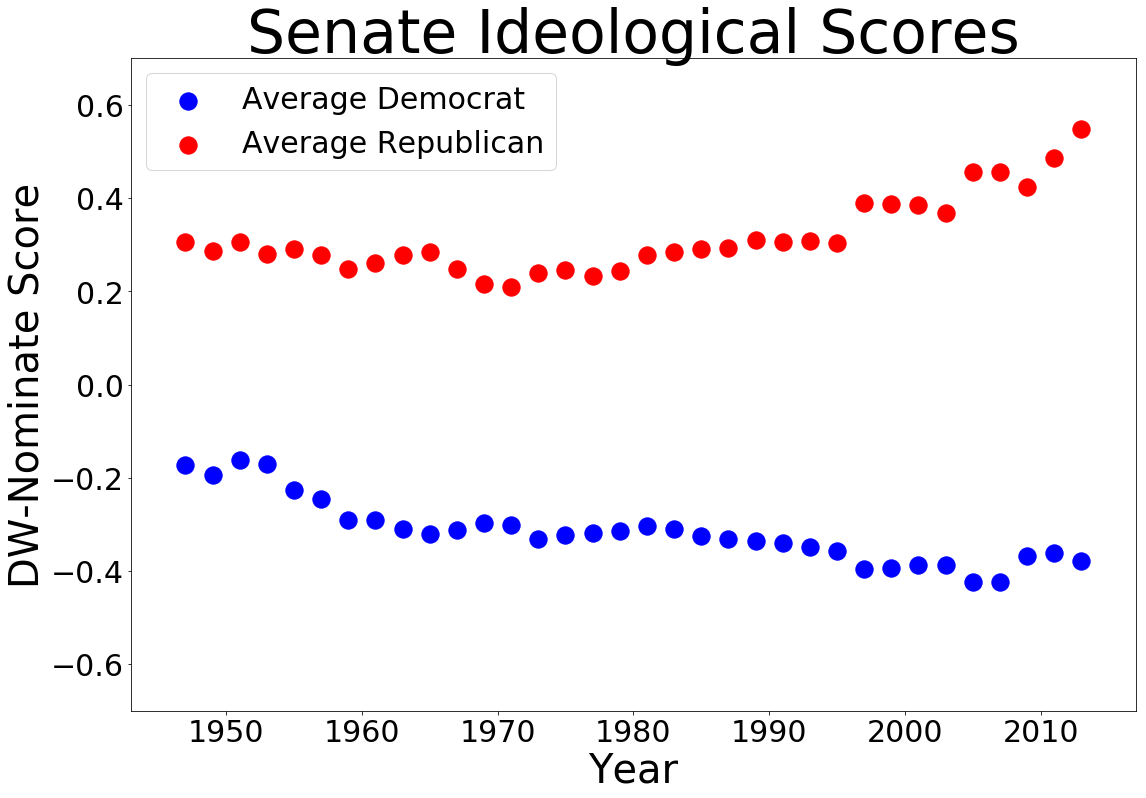

In [3]:
#https://www.brookings.edu/wp-content/uploads/2017/01/vitalstats_ch8_tbl7.pdf
#measures are the average ideological positions 
senate_ideology_df = pd.read_csv('data/ideological_positions_senate_committees.csv', index_col=1)
house_ideology_df = pd.read_csv('data/ideological_positions_house_committees.csv', index_col=1)

senate_chamber_avg = senate_ideology_df.loc[senate_ideology_df['Committee'] == 'Chamber average']
senate_dems_avg = senate_chamber_avg.loc[senate_chamber_avg['Party'] == 'Democrats']
senate_repubs_avg = senate_chamber_avg.loc[senate_chamber_avg['Party'] == 'Republicans']

fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

for year, member in senate_dems_avg.iterrows(): 
    if int(year) == 1947: 
        ax.scatter(int(year), float(member['Position']), color='blue', label='Average Democrat', s=300)
    else: 
        ax.scatter(int(year), float(member['Position']), color='blue', s=300)
        
for year, member in senate_repubs_avg.iterrows(): 
    if int(year) == 1947: 
        ax.scatter(int(year), float(member['Position']), color='red', label='Average Republican', s=300)
    else: 
        ax.scatter(int(year), float(member['Position']), color='red', s=300)

ax.set_title('Senate Ideological Scores', fontsize=60)
ax.set_ylim(-0.7, 0.7)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('DW-Nominate Score', fontsize=40)
ax.tick_params(labelsize=30)
ax.legend(fontsize=30)
plt.show()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


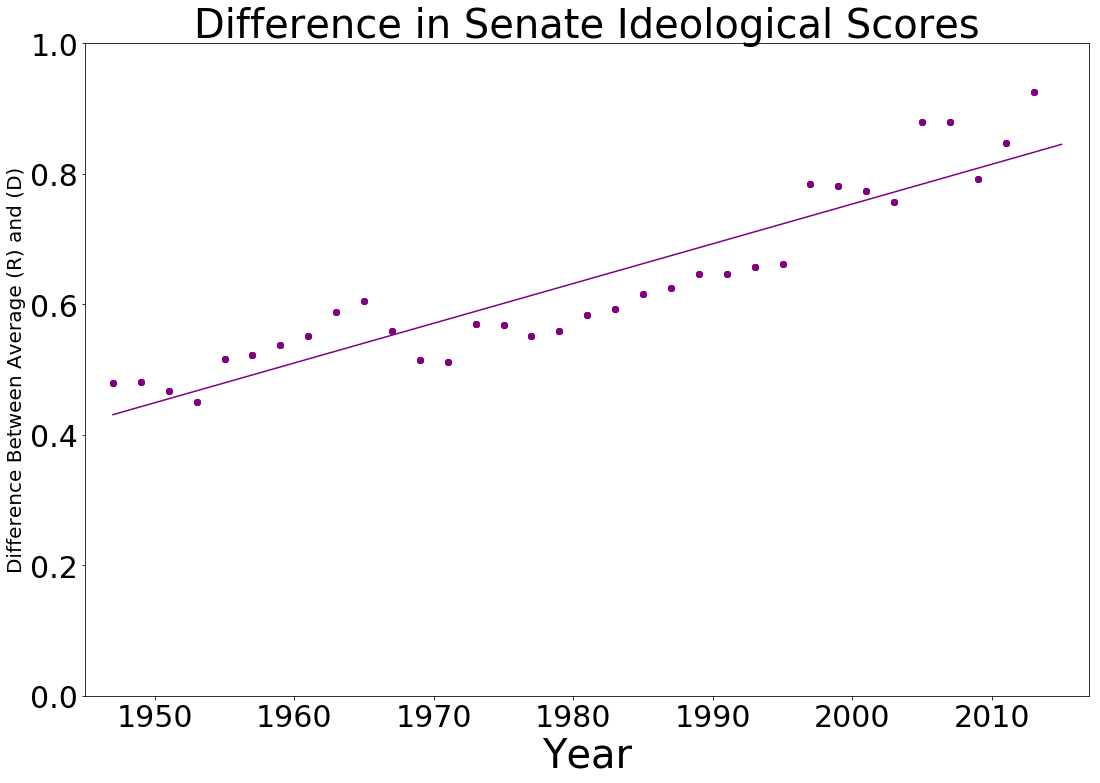

In [50]:
fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

for year in senate_chamber_avg.index.values: 
    ax.scatter(year, float(senate_repubs_avg.loc[year]['Position']) - float(senate_dems_avg.loc[year]['Position']), color='purple')
#plt.plot(list(senate_chamber_avg.index.values), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

ax.set_title('Difference in Senate Ideological Scores', fontsize=40)
ax.set_xlim(1945, 2017)
ax.set_ylim(0, 1.0)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('Difference Between Average (R) and (D)', fontsize=20)
ax.tick_params(labelsize=30)
ax.legend(fontsize=30)
senate_ideological_difference = pd.to_numeric(senate_repubs_avg['Position']) - pd.to_numeric(senate_dems_avg['Position'])
best_fit_coeffs = np.polyfit(list(set(senate_chamber_avg.index.values)), list(senate_ideological_difference), deg=1)
func = np.poly1d(best_fit_coeffs)
x_0, x_1 = 1947, 2015
ax.plot([x_0, x_1], [func(x_0), func(x_1)], color='purple')
plt.show()


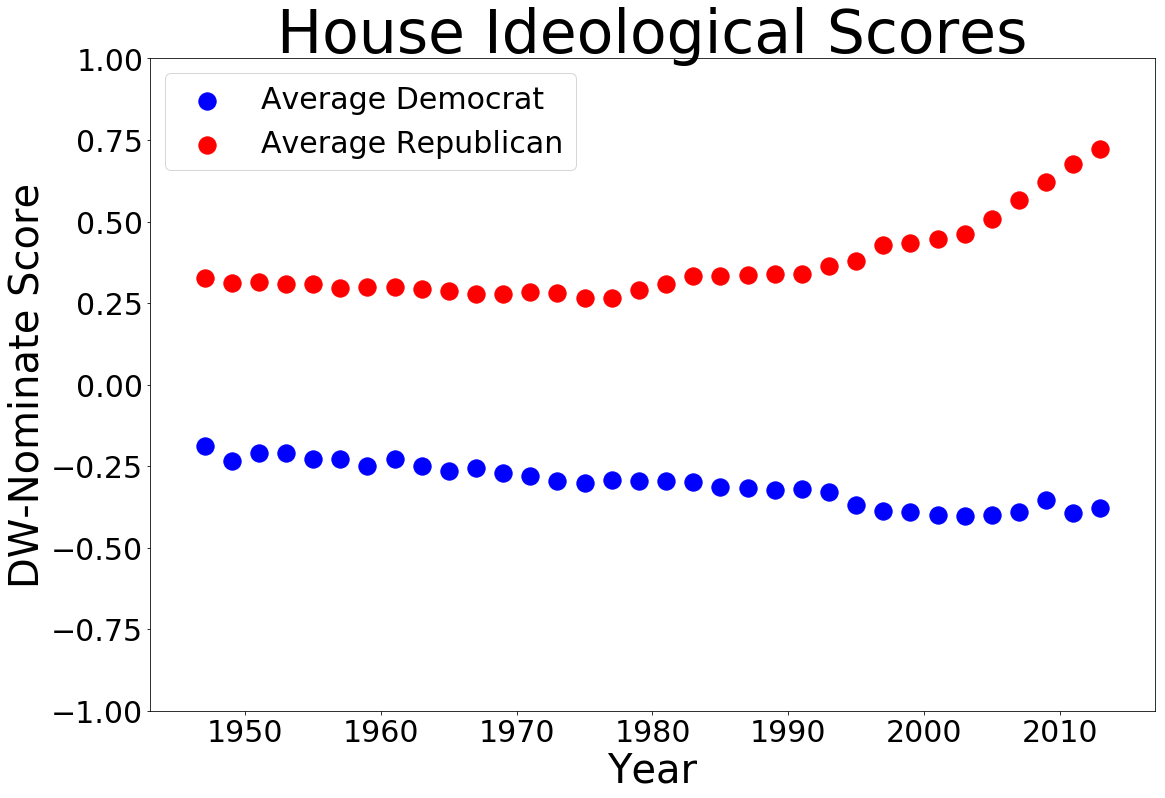

In [24]:
'''Now we'll do the same for the House.'''
#house_ideology_df

house_chamber_avg = house_ideology_df.loc[house_ideology_df['Committee'] == 'Chamber average']
house_dems_avg = house_chamber_avg.loc[house_chamber_avg['Party'] == 'Democrats']
house_repubs_avg = house_chamber_avg.loc[house_chamber_avg['Party'] == 'Republicans']

fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

for year, member in house_dems_avg.iterrows(): 
    if int(year) == 1947: 
        ax.scatter(int(year), float(member['Position']), color='blue', label='Average Democrat', s=300)
    else: 
        ax.scatter(int(year), float(member['Position']), color='blue', s=300)
        
for year, member in house_repubs_avg.iterrows(): 
    if int(year) == 1947: 
        ax.scatter(int(year), float(member['Position']), color='red', label='Average Republican', s=300)
    else: 
        ax.scatter(int(year), float(member['Position']), color='red', s=300)

ax.set_title('House Ideological Scores', fontsize=60)
ax.set_ylim(-1, 1)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('DW-Nominate Score', fontsize=40)
ax.tick_params(labelsize=30)
ax.legend(fontsize=30)
plt.show()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


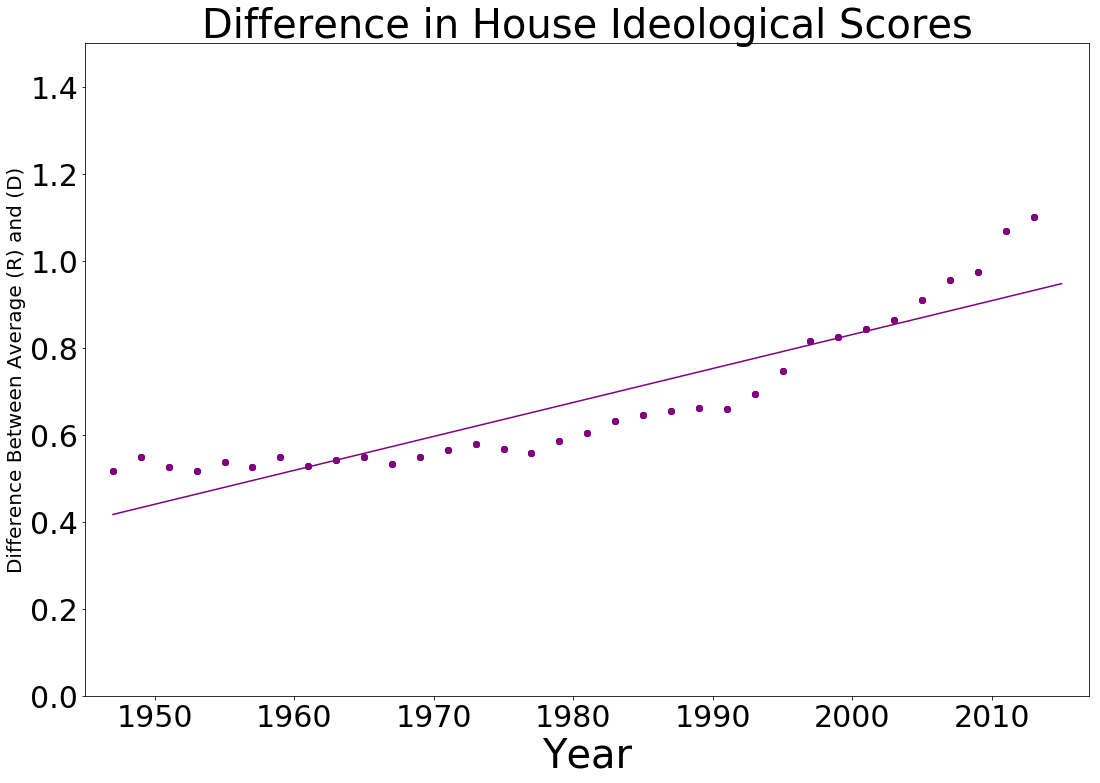

In [48]:
fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

for year in house_chamber_avg.index.values: 
    ax.scatter(year, float(house_repubs_avg.loc[year]['Position']) - float(house_dems_avg.loc[year]['Position']), color='purple')
#plt.plot(list(senate_chamber_avg.index.values), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

ax.set_title('Difference in House Ideological Scores', fontsize=40)
ax.set_xlim(1945, 2017)
ax.set_ylim(0, 1.5)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('Difference Between Average (R) and (D)', fontsize=20)
ax.tick_params(labelsize=30)
ax.legend(fontsize=30)
house_ideological_difference = pd.to_numeric(house_repubs_avg['Position']) - pd.to_numeric(house_dems_avg['Position'])
best_fit_coeffs = np.polyfit(list(set(house_chamber_avg.index.values)), list(house_ideological_difference), deg=1)
func = np.poly1d(best_fit_coeffs)
x_0, x_1 = 1947, 2015
ax.plot([x_0, x_1], [func(x_0), func(x_1)], color='purple')
plt.show()

# Party Vote Unity

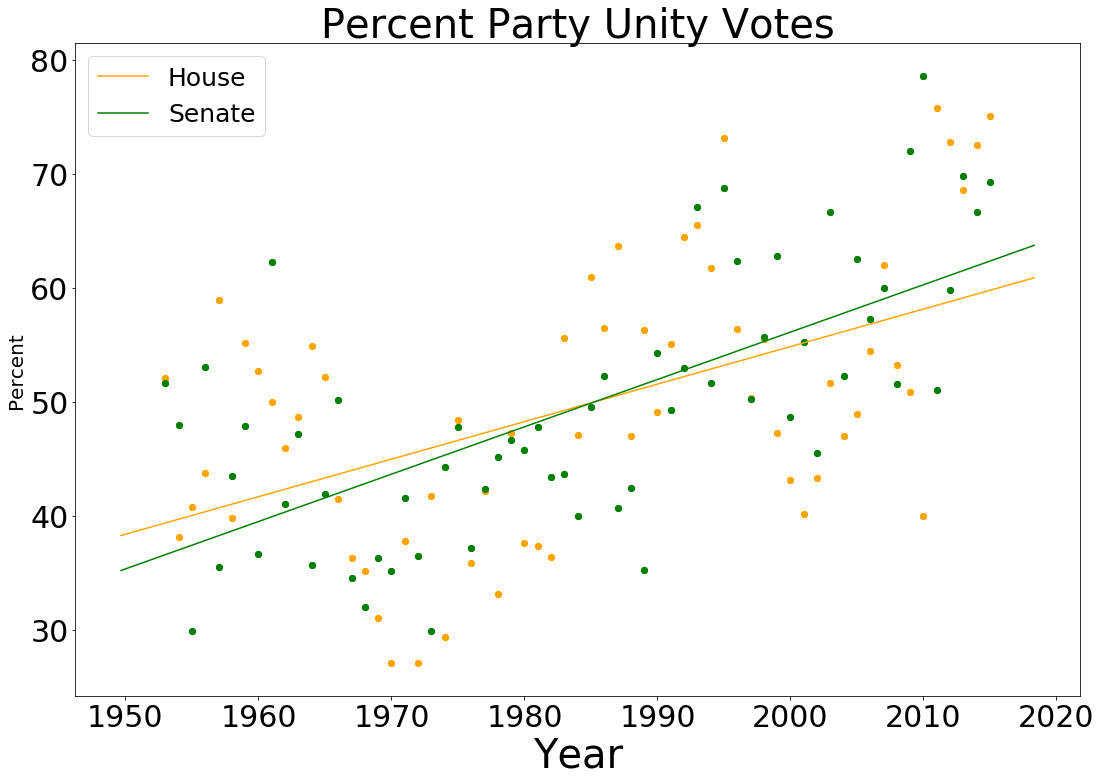

In [44]:
party_vote_unity_df = pd.read_csv('data/party_vote_unity.csv', index_col=0)
house_party_vote_unity = party_vote_unity_df.loc[party_vote_unity_df['Chamber'] == 'House']
senate_party_vote_unity = party_vote_unity_df.loc[party_vote_unity_df['Chamber'] == 'Senate']
fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

#https://www.brookings.edu/wp-content/uploads/2017/01/vitalstats_ch8_tbl3.pdf
#house_party_vote_unity.loc[1953]['PctPartyUnityVotes']

'''Data include the percentage of roll-call votes in which a percentage of voting Dems opposed
a majority of voting Republicans'''
for year in party_vote_unity_df.index.values: 
    ax.scatter(year, house_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='orange')
    ax.scatter(year, senate_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='green')
house_best_fit_coeffs = np.polyfit(list(set(house_party_vote_unity.index.values)), 
                                   list(house_party_vote_unity['PctPartyUnityVotes']), deg=1)
house_func = np.poly1d(house_best_fit_coeffs)
x_0, x_1 = ax.get_xlim()
ax.plot([x_0, x_1], [house_func(x_0), house_func(x_1)], color='orange', label='House')

senate_best_fit_coeffs = np.polyfit(list(set(senate_party_vote_unity.index.values)), 
                                   list(senate_party_vote_unity['PctPartyUnityVotes']), deg=1)
senate_func = np.poly1d(senate_best_fit_coeffs)
ax.plot([x_0, x_1], [senate_func(x_0), senate_func(x_1)], color='green', label='Senate')
ax.legend(fontsize=25)

ax.set_title('Percent Party Unity Votes', fontsize=40)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('Percent', fontsize=20)
ax.tick_params(labelsize=30)

plt.show()

# Ticket Splitting

What is the source of all this partisanship? Well, turns out that it's voters. 

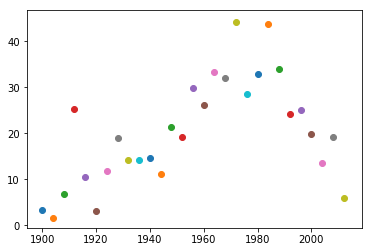

In [56]:
'''Measures percent of congressional districts where the winning representative and presidential candidate
were from different parties.'''
ticket_splitting_df.head(10)
for year in ticket_splitting_df.index.values: 
    plt.scatter(year, ticket_splitting_df.loc[year]['PctSplitResult'])
plt.show()